In [1]:
import pandas as pd

from mitotic_classifer import *

# Running SVM model with file:
# 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
# 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs
# 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs


In [2]:
df_ori_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')

df_ori_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_final_data.csv')
df_cellcyle_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_singlecell_cellcycle.csv')
df_ori_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_final_data.csv')
df_cellcyle_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_singlecell_cellcycle.csv')


# 1. 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#

In [3]:
# print(df_cellcyle_230109.groupby('cell_cycle').count())
df_all=merge_data(df1=df_ori_230109,df2=df_cellcyle_230109,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2/M,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872,...,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
S,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766,...,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [4]:
data=pd.concat([df_all[df_all['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,1NM_24h,81.0,276.0,2.750691e+06,2.750691e+06,15930.383567,2247.453628,15930.383567,9966.271286,...,9130.129224,17100.886801,1,2023,4.607568,0.979882,1.467222,1.821416,G2,G2/M
1,RPE-1,NT,144.0,253.0,2.290462e+06,2.290462e+06,14557.588853,1949.450146,14557.588853,9053.210966,...,9003.247083,20998.167453,1,2037,3.836659,0.989341,1.477376,1.669631,G2,G2/M
2,RPE-1,Palb_24h,73.0,484.0,2.954587e+06,2.954587e+06,7920.150502,1368.890823,7920.150502,6104.518314,...,6524.666344,11099.372821,1,6524,4.949106,1.041632,4.731665,3.194077,G2,G2/M
3,RPE-1,1NM_24h,106.0,174.0,2.319994e+06,2.319994e+06,21434.213855,2770.355540,21434.213855,13333.299871,...,8756.331640,19214.702524,1,1357,3.886126,1.043184,0.984192,1.148284,G2,G2/M
4,RPE-1,1NM_TAK_24h,75.0,208.0,2.464459e+06,2.464459e+06,19216.990119,2955.819638,19216.990119,11848.359998,...,8759.993230,15456.910460,1,1321,4.128113,1.495672,0.958082,1.372661,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_12h,131.0,205.0,2.117981e+06,2.117981e+06,14490.537387,2371.604897,14490.537387,10331.615180,...,10907.117922,17167.364920,1,1526,3.547742,1.061180,1.106763,1.352863,G2,G2/M
16868,RPE-1,1NM_TAK_12h,30.0,171.0,2.400563e+06,2.400563e+06,24289.947423,5394.820617,24289.947423,14038.381764,...,9689.176376,14653.151686,1,623,4.021084,1.013988,0.451844,1.128486,G2,G2/M
16869,RPE-1,NT,163.0,167.0,2.138506e+06,2.138506e+06,22076.131975,3984.613526,22076.131975,12805.425179,...,10901.339569,27947.714503,1,776,3.582123,1.086475,0.562810,1.102089,G2,G2/M
16870,RPE-1,TAK931_24h,189.0,275.0,2.388521e+06,2.388521e+06,12716.334351,2535.051004,12716.334351,8685.530800,...,6418.855655,11202.441597,1,1605,4.000913,1.048236,1.164059,1.814816,G2,G2/M


# pre-trained SVM
# without Edu

accuracy 0.3362375533428165


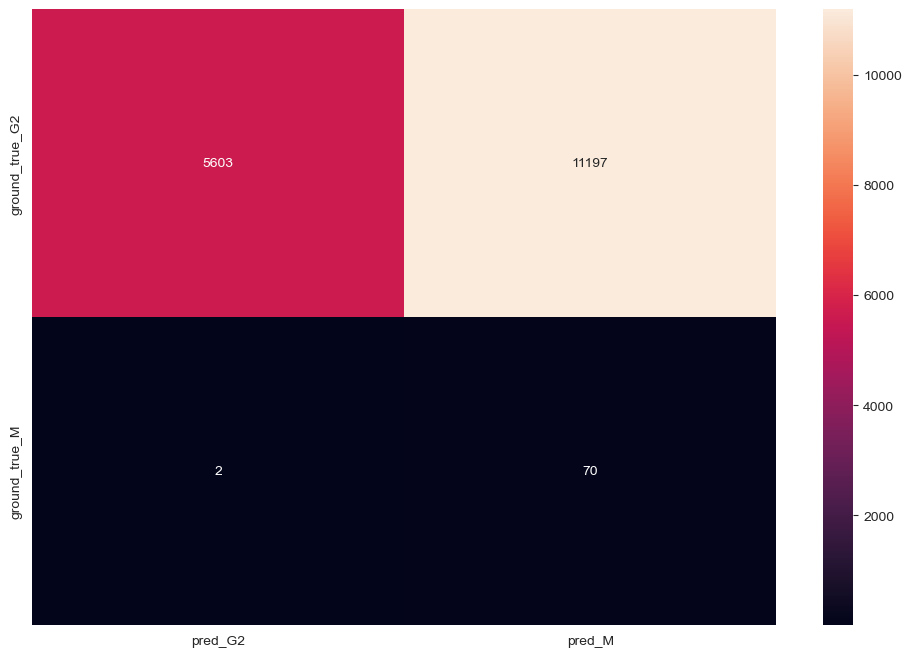

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,1NM_24h,81.0,276.0,2.750691e+06,2.750691e+06,15930.383567,2247.453628,15930.383567,9966.271286,...,17100.886801,1,2023,4.607568,0.979882,1.467222,1.821416,G2,G2/M,M
1,RPE-1,NT,144.0,253.0,2.290462e+06,2.290462e+06,14557.588853,1949.450146,14557.588853,9053.210966,...,20998.167453,1,2037,3.836659,0.989341,1.477376,1.669631,G2,G2/M,M
2,RPE-1,Palb_24h,73.0,484.0,2.954587e+06,2.954587e+06,7920.150502,1368.890823,7920.150502,6104.518314,...,11099.372821,1,6524,4.949106,1.041632,4.731665,3.194077,G2,G2/M,G2
3,RPE-1,1NM_24h,106.0,174.0,2.319994e+06,2.319994e+06,21434.213855,2770.355540,21434.213855,13333.299871,...,19214.702524,1,1357,3.886126,1.043184,0.984192,1.148284,G2,G2/M,M
4,RPE-1,1NM_TAK_24h,75.0,208.0,2.464459e+06,2.464459e+06,19216.990119,2955.819638,19216.990119,11848.359998,...,15456.910460,1,1321,4.128113,1.495672,0.958082,1.372661,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_12h,131.0,205.0,2.117981e+06,2.117981e+06,14490.537387,2371.604897,14490.537387,10331.615180,...,17167.364920,1,1526,3.547742,1.061180,1.106763,1.352863,G2,G2/M,M
16868,RPE-1,1NM_TAK_12h,30.0,171.0,2.400563e+06,2.400563e+06,24289.947423,5394.820617,24289.947423,14038.381764,...,14653.151686,1,623,4.021084,1.013988,0.451844,1.128486,G2,G2/M,M
16869,RPE-1,NT,163.0,167.0,2.138506e+06,2.138506e+06,22076.131975,3984.613526,22076.131975,12805.425179,...,27947.714503,1,776,3.582123,1.086475,0.562810,1.102089,G2,G2/M,M
16870,RPE-1,TAK931_24h,189.0,275.0,2.388521e+06,2.388521e+06,12716.334351,2535.051004,12716.334351,8685.530800,...,11202.441597,1,1605,4.000913,1.048236,1.164059,1.814816,G2,G2/M,G2


In [5]:
data_without_edu=check_pretrained_model(data=data,pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_without_edu

# include EdU

accuracy 0.3560929350403035


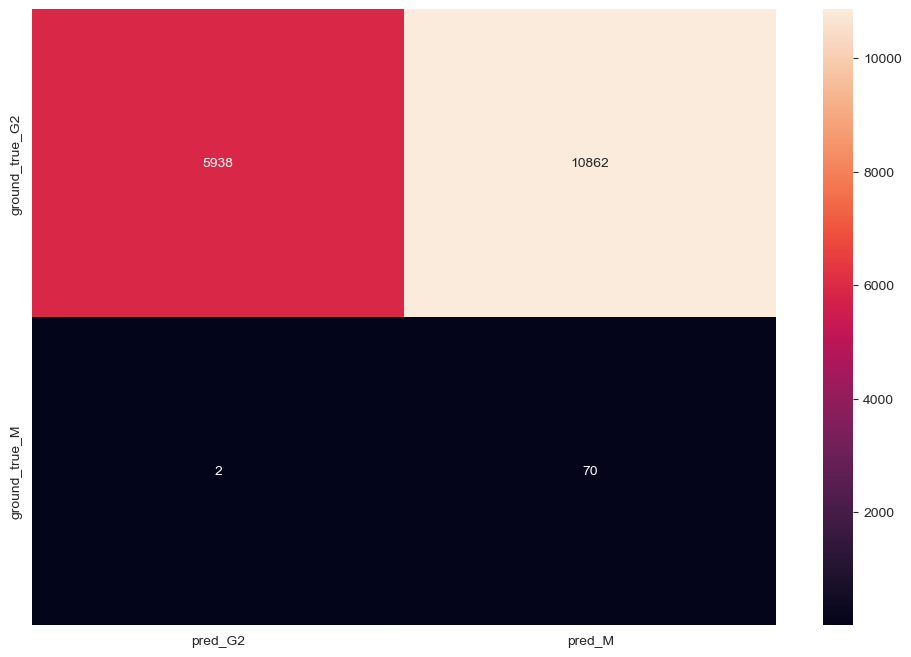

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,1NM_24h,81.0,276.0,2.750691e+06,2.750691e+06,15930.383567,2247.453628,15930.383567,9966.271286,...,17100.886801,1,2023,4.607568,0.979882,1.467222,1.821416,G2,G2/M,M
1,RPE-1,NT,144.0,253.0,2.290462e+06,2.290462e+06,14557.588853,1949.450146,14557.588853,9053.210966,...,20998.167453,1,2037,3.836659,0.989341,1.477376,1.669631,G2,G2/M,M
2,RPE-1,Palb_24h,73.0,484.0,2.954587e+06,2.954587e+06,7920.150502,1368.890823,7920.150502,6104.518314,...,11099.372821,1,6524,4.949106,1.041632,4.731665,3.194077,G2,G2/M,G2
3,RPE-1,1NM_24h,106.0,174.0,2.319994e+06,2.319994e+06,21434.213855,2770.355540,21434.213855,13333.299871,...,19214.702524,1,1357,3.886126,1.043184,0.984192,1.148284,G2,G2/M,M
4,RPE-1,1NM_TAK_24h,75.0,208.0,2.464459e+06,2.464459e+06,19216.990119,2955.819638,19216.990119,11848.359998,...,15456.910460,1,1321,4.128113,1.495672,0.958082,1.372661,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_12h,131.0,205.0,2.117981e+06,2.117981e+06,14490.537387,2371.604897,14490.537387,10331.615180,...,17167.364920,1,1526,3.547742,1.061180,1.106763,1.352863,G2,G2/M,M
16868,RPE-1,1NM_TAK_12h,30.0,171.0,2.400563e+06,2.400563e+06,24289.947423,5394.820617,24289.947423,14038.381764,...,14653.151686,1,623,4.021084,1.013988,0.451844,1.128486,G2,G2/M,M
16869,RPE-1,NT,163.0,167.0,2.138506e+06,2.138506e+06,22076.131975,3984.613526,22076.131975,12805.425179,...,27947.714503,1,776,3.582123,1.086475,0.562810,1.102089,G2,G2/M,M
16870,RPE-1,TAK931_24h,189.0,275.0,2.388521e+06,2.388521e+06,12716.334351,2535.051004,12716.334351,8685.530800,...,11202.441597,1,1605,4.000913,1.048236,1.164059,1.814816,G2,G2/M,M


In [6]:
data_with_edu=check_pretrained_model(data,pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_with_edu

# 2. 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs

In [7]:
df_cellcyle_221108_P1.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382,...,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382
G1,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556,...,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556
G2,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339,...,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339
Late S,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378,...,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378
M,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,...,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775
Polyploid,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102,...,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102
Polyploid (replicating),6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,...,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327
Sub-G1,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074,...,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074


In [8]:
df_all_p1=merge_data(df1=df_ori_221108_P1,df2=df_cellcyle_221108_P1,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p1.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461,...,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461
G1,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958,...,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958
G2,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930,...,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930
Late S,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,...,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148
M,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,...,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437
Polyploid,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
Polyploid (replicating),3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,...,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485
Sub-G1,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989


In [9]:
data_p1=pd.concat([df_all_p1[df_all_p1['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p1

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,U2OS,SCR,273.0,228.0,2.300911e+06,2.300911e+06,15086.213844,3007.302243,15086.213844,10091.714028,...,4728.850714,7755.549256,1,1060,3.613514,1.001794,1.219848,1.358110,G2,G2/M
1,RPE-1,ZMAT5,172.0,301.0,1.764044e+06,1.764044e+06,9764.985025,947.090922,9764.985025,5860.611775,...,5265.136039,9106.250856,1,5030,3.833006,1.012533,4.365842,1.843175,G2,G2/M
2,RPE-1,NT,167.0,209.0,1.697389e+06,1.697389e+06,11234.614901,1664.820109,11234.614901,8121.479861,...,5738.543228,7764.979492,1,2025,3.688174,1.056787,1.757620,1.279812,G2,G2/M
3,RPE-1,ZMAT5,157.0,263.0,1.672333e+06,1.672333e+06,9344.092421,1427.773346,9344.092421,6358.681506,...,7435.449142,12735.674001,1,2349,3.633731,1.012840,2.038839,1.610482,G2,G2/M
4,MM231,C16orf72,491.0,305.0,2.562793e+06,2.562793e+06,11062.988191,3776.723819,11062.988191,8402.598760,...,15337.429653,22617.293914,1,1054,4.883638,1.349160,2.052772,2.784837,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,CCNA2,109.0,313.0,2.258568e+06,2.258568e+06,10997.695326,1978.265086,10997.695326,7215.871471,...,7184.305726,11072.528919,1,2001,4.907532,1.038043,1.736789,1.916657,G2,G2/M
63363,U2OS,INHBE,649.0,327.0,2.463099e+06,2.463099e+06,11422.347764,2875.690225,11422.347764,7532.411652,...,5483.066135,6988.666640,1,1342,3.868226,0.981647,1.544374,1.947815,G2,G2/M
63364,MM231,SCR,498.0,124.0,2.435049e+06,2.435049e+06,26621.643837,5719.003479,26621.643837,19637.491262,...,10505.231944,24341.981383,1,574,4.640211,1.436041,1.117923,1.132196,G2,G2/M
63365,MM231,CCNA2,41.0,200.0,1.898872e+06,1.898872e+06,12991.720475,2573.597465,12991.720475,9494.357616,...,8693.350603,9868.205506,1,1227,3.618475,0.976000,2.389706,1.826123,G2,G2/M


without Edu

accuracy 0.40271750280114255


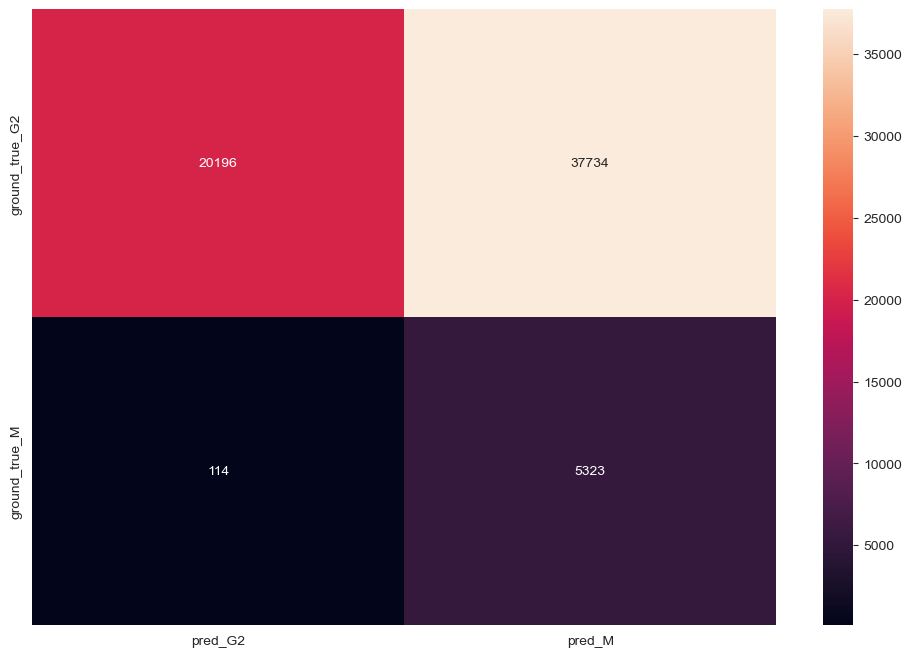

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,SCR,273.0,228.0,2.300911e+06,2.300911e+06,15086.213844,3007.302243,15086.213844,10091.714028,...,7755.549256,1,1060,3.613514,1.001794,1.219848,1.358110,G2,G2/M,G2
1,RPE-1,ZMAT5,172.0,301.0,1.764044e+06,1.764044e+06,9764.985025,947.090922,9764.985025,5860.611775,...,9106.250856,1,5030,3.833006,1.012533,4.365842,1.843175,G2,G2/M,G2
2,RPE-1,NT,167.0,209.0,1.697389e+06,1.697389e+06,11234.614901,1664.820109,11234.614901,8121.479861,...,7764.979492,1,2025,3.688174,1.056787,1.757620,1.279812,G2,G2/M,G2
3,RPE-1,ZMAT5,157.0,263.0,1.672333e+06,1.672333e+06,9344.092421,1427.773346,9344.092421,6358.681506,...,12735.674001,1,2349,3.633731,1.012840,2.038839,1.610482,G2,G2/M,M
4,MM231,C16orf72,491.0,305.0,2.562793e+06,2.562793e+06,11062.988191,3776.723819,11062.988191,8402.598760,...,22617.293914,1,1054,4.883638,1.349160,2.052772,2.784837,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,CCNA2,109.0,313.0,2.258568e+06,2.258568e+06,10997.695326,1978.265086,10997.695326,7215.871471,...,11072.528919,1,2001,4.907532,1.038043,1.736789,1.916657,G2,G2/M,G2
63363,U2OS,INHBE,649.0,327.0,2.463099e+06,2.463099e+06,11422.347764,2875.690225,11422.347764,7532.411652,...,6988.666640,1,1342,3.868226,0.981647,1.544374,1.947815,G2,G2/M,G2
63364,MM231,SCR,498.0,124.0,2.435049e+06,2.435049e+06,26621.643837,5719.003479,26621.643837,19637.491262,...,24341.981383,1,574,4.640211,1.436041,1.117923,1.132196,G2,G2/M,M
63365,MM231,CCNA2,41.0,200.0,1.898872e+06,1.898872e+06,12991.720475,2573.597465,12991.720475,9494.357616,...,9868.205506,1,1227,3.618475,0.976000,2.389706,1.826123,G2,G2/M,G2


In [10]:
data_without_edu = check_pretrained_model(data=data_p1, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

include EdU

accuracy 0.4024650054444743


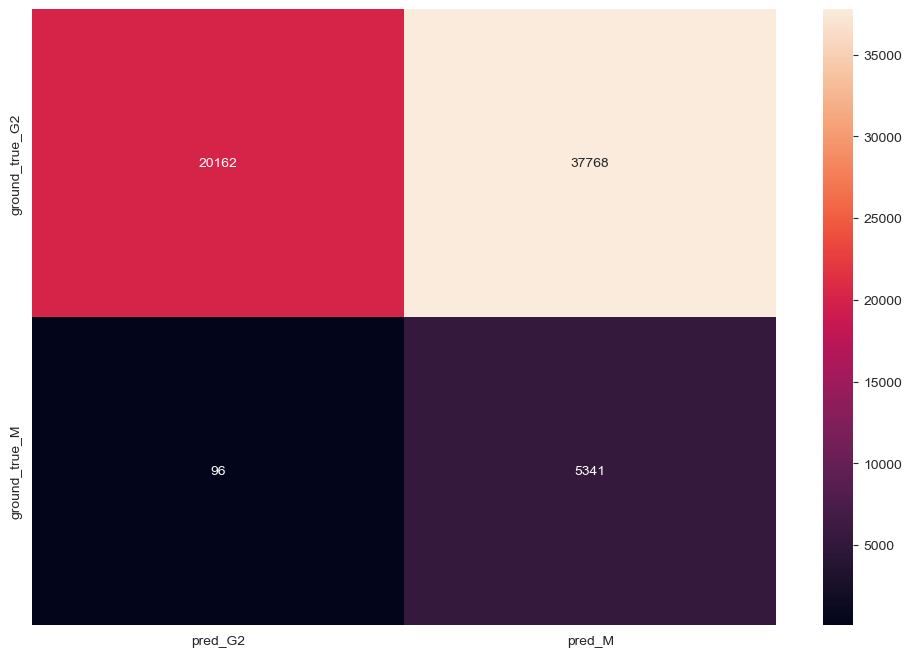

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,SCR,273.0,228.0,2.300911e+06,2.300911e+06,15086.213844,3007.302243,15086.213844,10091.714028,...,7755.549256,1,1060,3.613514,1.001794,1.219848,1.358110,G2,G2/M,G2
1,RPE-1,ZMAT5,172.0,301.0,1.764044e+06,1.764044e+06,9764.985025,947.090922,9764.985025,5860.611775,...,9106.250856,1,5030,3.833006,1.012533,4.365842,1.843175,G2,G2/M,G2
2,RPE-1,NT,167.0,209.0,1.697389e+06,1.697389e+06,11234.614901,1664.820109,11234.614901,8121.479861,...,7764.979492,1,2025,3.688174,1.056787,1.757620,1.279812,G2,G2/M,M
3,RPE-1,ZMAT5,157.0,263.0,1.672333e+06,1.672333e+06,9344.092421,1427.773346,9344.092421,6358.681506,...,12735.674001,1,2349,3.633731,1.012840,2.038839,1.610482,G2,G2/M,G2
4,MM231,C16orf72,491.0,305.0,2.562793e+06,2.562793e+06,11062.988191,3776.723819,11062.988191,8402.598760,...,22617.293914,1,1054,4.883638,1.349160,2.052772,2.784837,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,CCNA2,109.0,313.0,2.258568e+06,2.258568e+06,10997.695326,1978.265086,10997.695326,7215.871471,...,11072.528919,1,2001,4.907532,1.038043,1.736789,1.916657,G2,G2/M,M
63363,U2OS,INHBE,649.0,327.0,2.463099e+06,2.463099e+06,11422.347764,2875.690225,11422.347764,7532.411652,...,6988.666640,1,1342,3.868226,0.981647,1.544374,1.947815,G2,G2/M,G2
63364,MM231,SCR,498.0,124.0,2.435049e+06,2.435049e+06,26621.643837,5719.003479,26621.643837,19637.491262,...,24341.981383,1,574,4.640211,1.436041,1.117923,1.132196,G2,G2/M,M
63365,MM231,CCNA2,41.0,200.0,1.898872e+06,1.898872e+06,12991.720475,2573.597465,12991.720475,9494.357616,...,9868.205506,1,1227,3.618475,0.976000,2.389706,1.826123,G2,G2/M,G2


In [11]:
data_with_edu = check_pretrained_model(data_p1, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

# 3. 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs

In [12]:
df_all_p2=merge_data(df1=df_ori_221108_P2,df2=df_cellcyle_221108_P2,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p2.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,concentration,label,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046,...,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046
G2/M,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086,...,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086
Polyploid,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353,...,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353
Polyploid (replicating),1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,...,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740
S,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933,...,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933
Sub-G1,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251,...,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251


In [13]:
data_p2=pd.concat([df_all_p2[df_all_p2['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p2

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,U2OS,PRIM1,1191.0,210.0,2.186541e+06,2.186541e+06,13392.768784,3919.209795,13392.768784,10412.098622,...,5426.087039,7934.982738,1,860.0,3.554574,0.998438,0.906773,1.116142,G2,G2/M
1,MM231,PRIM1,518.0,96.0,1.612521e+06,1.612521e+06,24582.459200,5628.020827,24582.459200,16797.092478,...,9360.179830,15794.768917,1,359.0,3.660457,1.015838,0.683273,0.825603,G2,G2/M
2,MM231,NSA2,540.0,184.0,1.476711e+06,1.476711e+06,11592.380016,1202.681359,11592.380016,8025.602876,...,9223.909480,12150.516830,1,2373.0,3.352166,1.051495,4.516456,1.582406,G2,G2/M
3,U2OS,PRIM1,784.0,208.0,2.030582e+06,2.030582e+06,12396.604068,4564.225650,12396.604068,9762.411755,...,6685.155446,9511.239250,1,602.0,3.301037,0.942090,0.634741,1.105512,G2,G2/M
4,MM231,NSA2,328.0,163.0,1.472274e+06,1.472274e+06,12074.746418,2119.812673,12074.746418,9032.357086,...,10435.957934,14488.894637,1,1107.0,3.342094,1.187663,2.106918,1.401805,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,PPIL4,348.0,192.0,1.656170e+06,1.656170e+06,13149.866451,2917.835543,13149.866451,8625.886629,...,10006.336151,16884.472678,1,749.0,3.759542,1.057709,1.425548,1.651206,G2,G2/M
25082,RPE-1,ELOF1,383.0,182.0,1.789917e+06,1.789917e+06,18382.044008,3733.744535,16290.484863,9834.709421,...,9560.110655,20690.455373,1,709.0,4.259542,0.991826,0.615384,1.275180,G2,G2/M
25083,RPE-1,PPIL4,55.0,167.0,1.667498e+06,1.667498e+06,14401.741211,1863.263636,14401.741211,9985.019873,...,9252.772939,19916.729095,1,1524.0,3.968217,1.026399,1.322772,1.170082,G2,G2/M
25084,MM231,RPL37A,5.0,146.0,1.410936e+06,1.410936e+06,13500.981552,3468.106892,13500.981552,9663.946570,...,10771.190550,12541.716046,1,597.0,3.202856,0.950238,1.136251,1.255604,G2,G2/M


without Edu

accuracy 0.3561348959579048


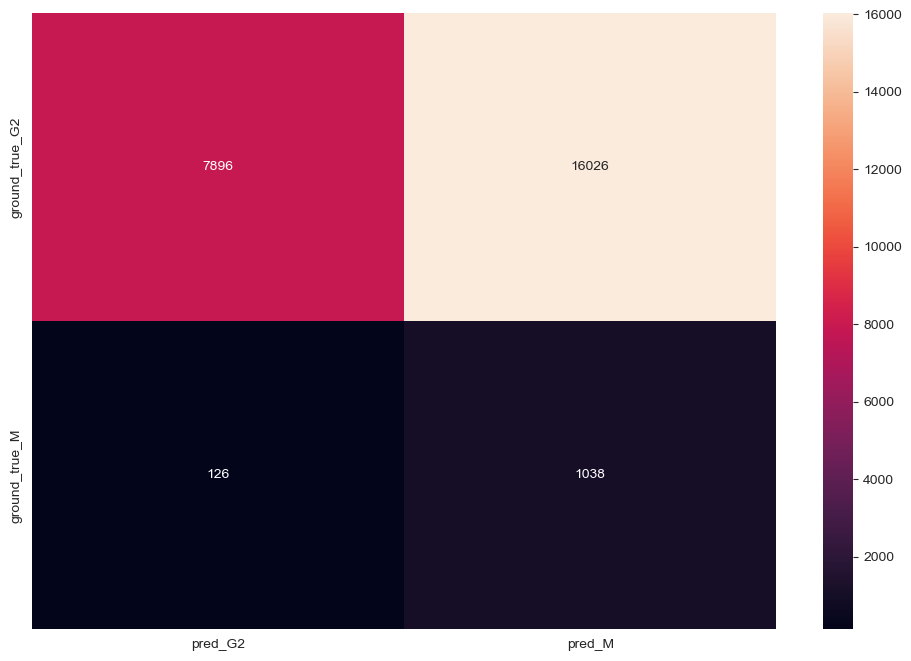

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,PRIM1,1191.0,210.0,2.186541e+06,2.186541e+06,13392.768784,3919.209795,13392.768784,10412.098622,...,7934.982738,1,860.0,3.554574,0.998438,0.906773,1.116142,G2,G2/M,M
1,MM231,PRIM1,518.0,96.0,1.612521e+06,1.612521e+06,24582.459200,5628.020827,24582.459200,16797.092478,...,15794.768917,1,359.0,3.660457,1.015838,0.683273,0.825603,G2,G2/M,M
2,MM231,NSA2,540.0,184.0,1.476711e+06,1.476711e+06,11592.380016,1202.681359,11592.380016,8025.602876,...,12150.516830,1,2373.0,3.352166,1.051495,4.516456,1.582406,G2,G2/M,M
3,U2OS,PRIM1,784.0,208.0,2.030582e+06,2.030582e+06,12396.604068,4564.225650,12396.604068,9762.411755,...,9511.239250,1,602.0,3.301037,0.942090,0.634741,1.105512,G2,G2/M,M
4,MM231,NSA2,328.0,163.0,1.472274e+06,1.472274e+06,12074.746418,2119.812673,12074.746418,9032.357086,...,14488.894637,1,1107.0,3.342094,1.187663,2.106918,1.401805,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,PPIL4,348.0,192.0,1.656170e+06,1.656170e+06,13149.866451,2917.835543,13149.866451,8625.886629,...,16884.472678,1,749.0,3.759542,1.057709,1.425548,1.651206,G2,G2/M,M
25082,RPE-1,ELOF1,383.0,182.0,1.789917e+06,1.789917e+06,18382.044008,3733.744535,16290.484863,9834.709421,...,20690.455373,1,709.0,4.259542,0.991826,0.615384,1.275180,G2,G2/M,M
25083,RPE-1,PPIL4,55.0,167.0,1.667498e+06,1.667498e+06,14401.741211,1863.263636,14401.741211,9985.019873,...,19916.729095,1,1524.0,3.968217,1.026399,1.322772,1.170082,G2,G2/M,M
25084,MM231,RPL37A,5.0,146.0,1.410936e+06,1.410936e+06,13500.981552,3468.106892,13500.981552,9663.946570,...,12541.716046,1,597.0,3.202856,0.950238,1.136251,1.255604,G2,G2/M,M


In [14]:
data_without_edu = check_pretrained_model(data=data_p2, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

including Edu

accuracy 0.3712030614685482


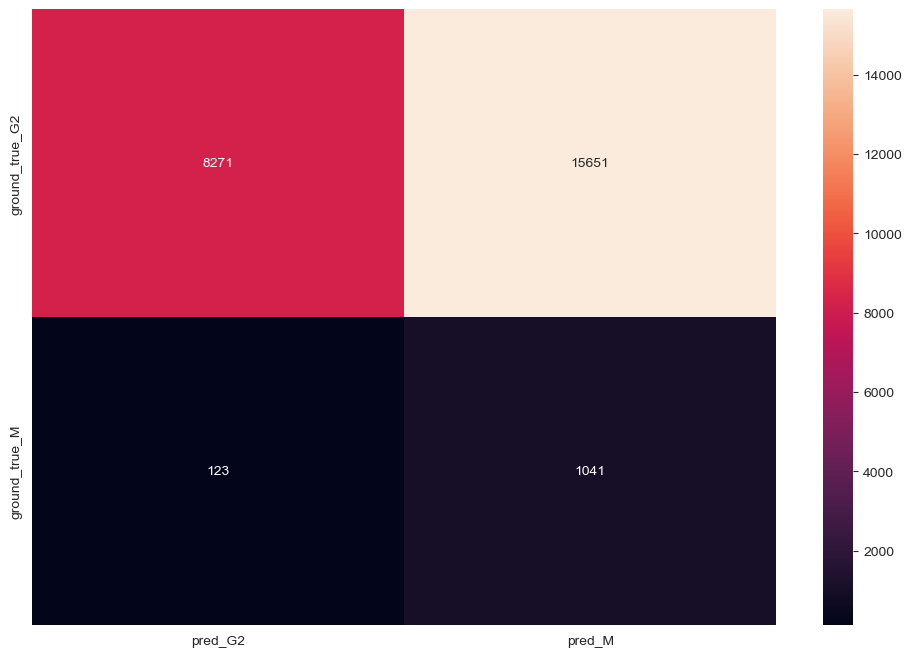

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,PRIM1,1191.0,210.0,2.186541e+06,2.186541e+06,13392.768784,3919.209795,13392.768784,10412.098622,...,7934.982738,1,860.0,3.554574,0.998438,0.906773,1.116142,G2,G2/M,G2
1,MM231,PRIM1,518.0,96.0,1.612521e+06,1.612521e+06,24582.459200,5628.020827,24582.459200,16797.092478,...,15794.768917,1,359.0,3.660457,1.015838,0.683273,0.825603,G2,G2/M,M
2,MM231,NSA2,540.0,184.0,1.476711e+06,1.476711e+06,11592.380016,1202.681359,11592.380016,8025.602876,...,12150.516830,1,2373.0,3.352166,1.051495,4.516456,1.582406,G2,G2/M,M
3,U2OS,PRIM1,784.0,208.0,2.030582e+06,2.030582e+06,12396.604068,4564.225650,12396.604068,9762.411755,...,9511.239250,1,602.0,3.301037,0.942090,0.634741,1.105512,G2,G2/M,M
4,MM231,NSA2,328.0,163.0,1.472274e+06,1.472274e+06,12074.746418,2119.812673,12074.746418,9032.357086,...,14488.894637,1,1107.0,3.342094,1.187663,2.106918,1.401805,G2,G2/M,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,PPIL4,348.0,192.0,1.656170e+06,1.656170e+06,13149.866451,2917.835543,13149.866451,8625.886629,...,16884.472678,1,749.0,3.759542,1.057709,1.425548,1.651206,G2,G2/M,M
25082,RPE-1,ELOF1,383.0,182.0,1.789917e+06,1.789917e+06,18382.044008,3733.744535,16290.484863,9834.709421,...,20690.455373,1,709.0,4.259542,0.991826,0.615384,1.275180,G2,G2/M,M
25083,RPE-1,PPIL4,55.0,167.0,1.667498e+06,1.667498e+06,14401.741211,1863.263636,14401.741211,9985.019873,...,19916.729095,1,1524.0,3.968217,1.026399,1.322772,1.170082,G2,G2/M,M
25084,MM231,RPL37A,5.0,146.0,1.410936e+06,1.410936e+06,13500.981552,3468.106892,13500.981552,9663.946570,...,12541.716046,1,597.0,3.202856,0.950238,1.136251,1.255604,G2,G2/M,M


In [15]:
data_with_edu = check_pretrained_model(data_p2, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

In [ ]:
from omero_screen.image_analysis import Image
from cellpose import models
from omero_screen.general_functions import save_fig, generate_image, filter_segmentation, omero_connect, scale_img, \
    color_label
def n_segmentation(image):
    """perform cellpose segmentation using nuclear mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/Nuclei_Hoechst')

    n_channels = [[0, 0]]
    n_mask_array, n_flows, n_styles = model.eval(self.img_dict['DAPI'], channels=n_channels)

        # return cleaned up mask using filter function
    return filter_segmentation(n_mask_array)

def c_segmentation(image_DAPI,image_Tub):
    """perform cellpose segmentation using cell mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/HeLa_Tub_Hoechst')
    c_channels = [[2, 1]]
    # combine the 2 channel numpy array for cell segmentation with the nuclei channel
    comb_image = np.dstack([image_DAPI, image_Tub])
    c_masks_array, c_flows, c_styles = model.eval(comb_image, channels=c_channels)
    # return cleaned up mask using filter function
    return filter_segmentation(c_masks_array)

In [145]:
import skimage
check_8_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check8.tif')
check_tub8=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub8.tif')
check_10_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check10.tif')
check_tub10=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub10.tif')

In [146]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd

def same_img(image1,image2):
    props_1 = pd.DataFrame(regionprops_table(image1, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))
    props_2 = pd.DataFrame(regionprops_table(image2, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))

    if props_1.equals(props_2):
        print('the input two image are same')
    else:
        print('the two input image are different')
    return (props_1,props_2)

In [147]:

# props_1,props_2=same_img(check_7_DAPI,check_8_DAPI)
props_1,props_2=same_img(check_tub8,check_tub10)

the input two image are same
